In [1]:
import pandas as pd
import numpy as np
import re
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer
import transformers
from transformers import pipeline

c:\Users\lenovo\anaconda3\envs\nlp_env\lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [2]:
data=pd.read_csv("book_reviews_sample.csv")
data.head()

,index,reviewText,rating
0,11494,Clean and funny. A bit busy with all the diffe...,3
1,984,Alex a sexy hot cop and the PhD candidate. Wha...,4
2,1463,Good thing that this is a free story. I read i...,1
3,10342,"Action, action, action! Equipment keeps gettin...",4
4,5256,this was hands down the worse book i have ever...,1


In [3]:
data.info

<bound method DataFrame.info of     index                                         reviewText  rating
0   11494  Clean and funny. A bit busy with all the diffe...       3
1     984  Alex a sexy hot cop and the PhD candidate. Wha...       4
2    1463  Good thing that this is a free story. I read i...       1
3   10342  Action, action, action! Equipment keeps gettin...       4
4    5256  this was hands down the worse book i have ever...       1
..    ...                                                ...     ...
95   1794  Love this author. I have read most of her book...       5
96   6716  This book was not bad! I like the storyline ! ...       2
97   7372  This is part of a series I read and I loved th...       5
98   5676  Finally a Texas newspaper in Kindle format.Way...       4
99   7737  TJ and Jon are very HOT in this book.  Christi...       5

[100 rows x 3 columns]>

In [4]:
data['reviewText'][0]

'Clean and funny. A bit busy with all the different plots going on. But overall a good read. Bye now.'

In [5]:
data['reviewText_clean']=data.apply(lambda x: re.sub(r"([^\w\s])", "", x['reviewText'].lower()), axis=1)

In [6]:
data.head()

,index,reviewText,rating,reviewText_clean
0,11494,Clean and funny. A bit busy with all the diffe...,3,clean and funny a bit busy with all the differ...
1,984,Alex a sexy hot cop and the PhD candidate. Wha...,4,alex a sexy hot cop and the phd candidate what...
2,1463,Good thing that this is a free story. I read i...,1,good thing that this is a free story i read it...
3,10342,"Action, action, action! Equipment keeps gettin...",4,action action action equipment keeps getting b...
4,5256,this was hands down the worse book i have ever...,1,this was hands down the worse book i have ever...


In [7]:
vader_sentiment=SentimentIntensityAnalyzer()

In [10]:
data['vader_sentiment_score']=data['reviewText_clean'].apply(lambda review: vader_sentiment.polarity_scores(review)['compound'])

In [11]:
data.head()

,index,reviewText,rating,reviewText_clean,vader_sentiment_score
0,11494,Clean and funny. A bit busy with all the diffe...,3,clean and funny a bit busy with all the differ...,0.7684
1,984,Alex a sexy hot cop and the PhD candidate. Wha...,4,alex a sexy hot cop and the phd candidate what...,0.9325
2,1463,Good thing that this is a free story. I read i...,1,good thing that this is a free story i read it...,0.6740
3,10342,"Action, action, action! Equipment keeps gettin...",4,action action action equipment keeps getting b...,0.6652
4,5256,this was hands down the worse book i have ever...,1,this was hands down the worse book i have ever...,-0.4767


In [12]:
bins=[-1, -0.1, 0.1, 1]
names=['negative', 'neutral', 'positive']
data['vader_sentiment_label']=pd.cut(data['vader_sentiment_score'], bins, labels=names)

<Axes: xlabel='vader_sentiment_label'>

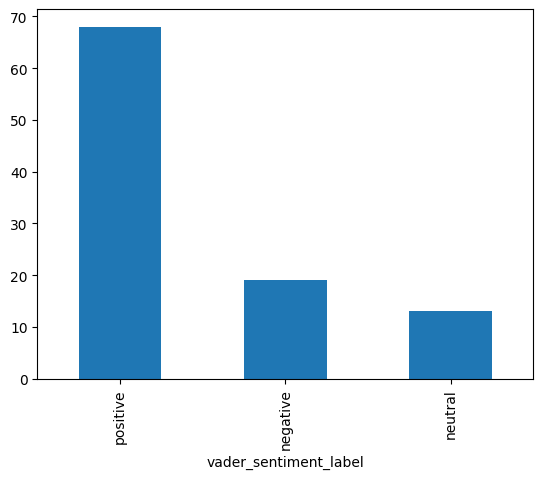

In [14]:
data['vader_sentiment_label'].value_counts().plot.bar()

In [16]:
transformer_pipeline=pipeline("sentiment-analysis")

No model was supplied, defaulted to distilbert/distilbert-base-uncased-finetuned-sst-2-english and revision 714eb0f (https://huggingface.co/distilbert/distilbert-base-uncased-finetuned-sst-2-english).
Using a pipeline without specifying a model name and revision in production is not recommended.
Device set to use cpu


In [17]:
transformer_labels=[]
for review in data['reviewText_clean'].values:
    sentiment_list=transformer_pipeline(review)
    sentiment_label=[sent['label'] for sent in sentiment_list]
    transformer_labels.append(sentiment_label)
    

<Axes: xlabel='transformer_sentiment_label'>

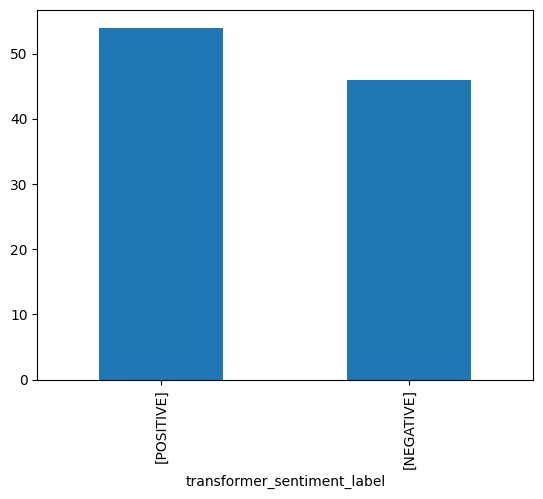

In [19]:
data['transformer_sentiment_label']=transformer_labels
data['transformer_sentiment_label'].value_counts().plot.bar()